# Creazione ed analisi dataset



**Introduzione al Progetto**: Bank Marketing


Questo progetto mira a sviluppare un modello di apprendimento supervisionato capace di predire la sottoscrizione di un deposito a termine da parte dei clienti di un istituto bancario portoghese, basandosi su informazioni raccolte durante campagne di marketing(diretto) telefonico.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATAFRAME: creazione ed elaborazione**
installazione e importazione di librerie Python:

    Librerie di base: numpy, pandas
    Librerie di visualizzazione: seaborn, matplotlib.pyplot, plotly.express
    Librerie di Machine Learning: sklearn, imblearn
    Librerie di utilità: tqdm, warnings, scipy.stats, IPython.display




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as skl
from tqdm import tqdm
import warnings
from scipy.stats import norm
from IPython.display import display, HTML

from sklearn.svm import SVC
from sklearn import preprocessing, metrics
from tabulate import tabulate
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV

from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, classification_report, precision_recall_curve, PrecisionRecallDisplay, roc_curve, RocCurveDisplay
from sklearn.cluster import KMeans
from collections import Counter


In [ ]:
!pip freeze > requirements.txt

**Informazioni sul dataset:**

il dataset possiede informazioni prese dal  UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing. Le informazioni, raccolte durante una campagna marketing telefonica, con anche più di un contatto con lo stesso cliente.

Il dataset presenta le seguenti variabili in input divisibili in sotto categorie:

*Dati del cliente della banca*

    age: (numerica)
    job: tipo di lavoro (categorico)
    marital: stato civile (categorico)
    education (categorico)
    default: ha un credito insoluto? (categorico)
    housing: ha un prestito per l'abitazione? (categorico)
    loan: ha un prestito personale? (categorico)

*Dati Relativi all'ultimo contatto della campagna in corso*

    contatto: tipo di comunicazione del contatto (categorico)
    mese: mese dell'anno dell'ultimo contatto (categorico)
    giorno_della_settimana: giorno della settimana dell'ultimo contatto (categorico)
    duration: durata dell'ultimo contatto, in secondi (numerico).

*Altri attributi*

    campagna: numero di contatti effettuati durante questa campagna e per questo cliente (numerico, include l'ultimo contatto)
    pdays: numero di giorni trascorsi dopo che il cliente è stato contattato per l'ultima volta da una campagna precedente (numerico; 999 significa che il cliente non è stato contattato in precedenza)
    precedente: numero di contatti effettuati prima di questa campagna e per questo cliente (numerico)
    risultato: risultato della campagna di marketing precedente (categorico).

*Attributi del contesto sociale ed economico*

    emp.var.rate: tasso di variazione dell'occupazione - indicatore trimestrale (numerico)
    cons.price.idx: indice dei prezzi al consumo - indicatore mensile (numerico)
    cons.conf.idx: indice di fiducia dei consumatori - indicatore mensile (numerico)
    euribor3m: tasso euribor a 3 mesi - indicatore giornaliero (numerico)
    nr.occupati: numero di dipendenti - indicatore trimestrale (numerico)

*Variabile di output (obiettivo desiderato)*

    y - il cliente ha sottoscritto un deposito a termine? (binario: 'sì', 'no')











**Creazione dataset:**


In [ ]:
# Lettura del dataset e creazione del dataframe
df = pd.read_csv('/content/drive/MyDrive/ProgettoIcon/bank-additional-full.csv', sep=';')
# Stampa delle prime cinque righe del dataframe
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr-employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


L'attributo duration influenza fortemente il target di output (ad esempio, se duration=0 allora y='no'). Tuttavia, la durata non è nota prima che venga eseguita una chiamata. Inoltre, dopo la fine della chiamata, y è ovviamente noto. Pertanto, questo input dovrebbe essere incluso solo per scopi di benchmark e dovrebbe essere scartato se l'intenzione è quella di avere un modello predittivo realistico.

In [ ]:
df = df.drop('duration', axis = 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr-employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Molti algoritmi di apprendimento automatico richiedono input numerici e non possono gestire direttamente le stringhe, per tanto si effettuano operazioni di conversione delle stringhe in numeri.

Campi dei quali non si conosce il valore saranno sostituiti in ogni colonna del dataset con lo stesso numero, ovvero -1.

In [ ]:
# Dizionario mesi->numeri
month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

#dizionario lavoro->codice
job_mapping = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 2,
    'housemaid': 3,
    'management': 4,
    'retired': 5,
    'self-employed': 6,
    'services': 7,
    'student': 8,
    'technician': 9,
    'unemployed': 10,
    'unknown': -1
}

marital_mapping = {
    'divorced': 0,
    'married': 1,
    'single': 2,
    'unknown': -1
}

education_mapping = {
    'basic.4y': 0,
    'high.school': 1,
    'illiterate': 2,
    'professional.course': 3,
    'university.degree': 4,
    'basic.6y': 5,
    'basic.9y': 6,
    'unknown' : -1

}

binary_unknown_mapping = {
    'no': 0,
    'yes': 1,
    'unknown' : -1
}

binary_mapping = {
    'no': 0,
    'yes': 1,
}

contact_mapping = {
    'telephone': 0,
    'cellular': 1
}
day_of_week_mapping = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4
}

poutcome_mapping = {
    'failure': 0,
    'nonexistent': 1,
    'success': 2
}

# attraverso replace rimpiazziamo le stringhe con i relativi numeri
df['month'] = df['month'].replace(month_mapping)
df['job'] = df['job'].replace(job_mapping)
df['marital'] = df['marital'].replace(marital_mapping)
df['education'] = df['education'].replace(education_mapping)
df['default'] = df['default'].replace(binary_unknown_mapping)
df['housing'] = df['housing'].replace(binary_unknown_mapping)
df['loan'] = df['loan'].replace(binary_unknown_mapping)
df['contact'] = df['contact'].replace(contact_mapping)
df['day_of_week'] = df['day_of_week'].replace(day_of_week_mapping)
df['poutcome'] = df['poutcome'].replace(poutcome_mapping)
df['y'] = df['y'].replace(binary_mapping)


df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr-employed,y
0,56,3,1,0,0,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,-1,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,1,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,5,0,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,1,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,6,-1,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,3,0,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,-1,-1,0,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,3,0,1,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,1,0,1,0,0,4,0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Data la presenza di valori unkown all'interno del dataset, si valuta la possibilità di rimuovere le righe che li contengono data la percentuale tendenzialmente esigua, tranne che per default dove si arriva ad un 20.87%.
Riflettendo sul ruolo di questi valori unkown nel dataset, ci si rende conto che unkown è un informazione in quanto l'utente che riceve la telefonata marketing sceglie se dare o meno quest'informazione. Unkown viene ritenuta un informazione circa l'engagement dell'utente, quindi utile nel contesto di predizione di conversione delle telefonate nell'apertura del deposito.

In [ ]:
for col in df.columns:
    unknown_count = (df[col] == -1).sum()
    total_count = len(df)
    percentage = (unknown_count / total_count) * 100
    print(f'La percentuale di valori "unknown" nella colonna {col} è: {percentage:.2f}%')


La percentuale di valori "unknown" nella colonna age è: 0.00%
La percentuale di valori "unknown" nella colonna job è: 0.80%
La percentuale di valori "unknown" nella colonna marital è: 0.19%
La percentuale di valori "unknown" nella colonna education è: 4.20%
La percentuale di valori "unknown" nella colonna default è: 20.87%
La percentuale di valori "unknown" nella colonna housing è: 2.40%
La percentuale di valori "unknown" nella colonna loan è: 2.40%
La percentuale di valori "unknown" nella colonna contact è: 0.00%
La percentuale di valori "unknown" nella colonna month è: 0.00%
La percentuale di valori "unknown" nella colonna day_of_week è: 0.00%
La percentuale di valori "unknown" nella colonna campaign è: 0.00%
La percentuale di valori "unknown" nella colonna pdays è: 0.00%
La percentuale di valori "unknown" nella colonna previous è: 0.00%
La percentuale di valori "unknown" nella colonna poutcome è: 0.00%
La percentuale di valori "unknown" nella colonna emp_var_rate è: 0.00%
La percent

## analisi delle correlazione tra features


Una **matrice di correlazione** è una tabella che mostra i coefficienti di correlazione tra molte variabili. Ogni cella nella tabella mostra la correlazione tra due variabili. Un coefficiente di correlazione varia tra -1 e 1, avvicinarsi ad uno dei due estremi significa avere una correlazione molto alta, la differenza è che:
* 1 correlazione positiva
* -1 correlazione negativa (proporzionali in modo inverso)


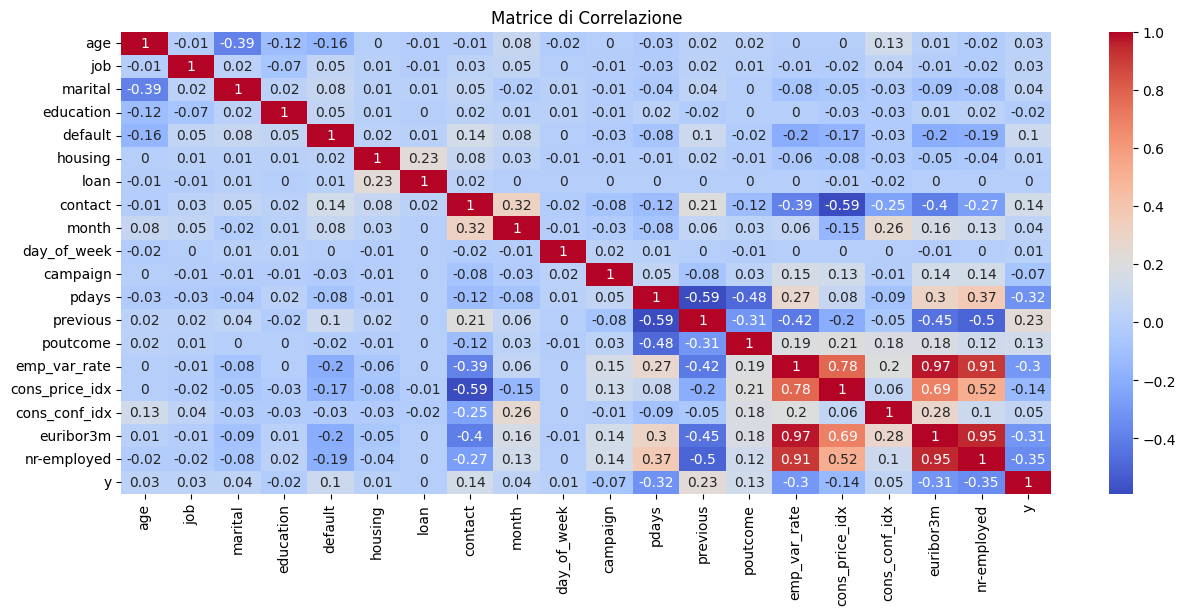

In [ ]:
# matrice di correlazione con arrotondamento a 2 decimali
corr_matrix = df.corr().round(2)

# l'arrotondamento comporta dei -0 riscritti come 0
corr_matrix = corr_matrix.replace(-0, 0)

# heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice di Correlazione")
plt.show()


Riepilogo Matrice di Correlazione

Correlazioni fortemente Positive (> 0,8):

    emp_var_rate e euribor3m (0,97)
    nr_employed e emp_var_rate (0,91)
    nr_employed e euribor3m (0,95)

Buone Correlazioni positive (> 0,5):

    cons_price_idx e emp_var_rate (0,78)
    euribor3m e cons_price_idx (0,69)
    nr_employed e cons_price_idx (0,52)

Buone Correlazioni Negative (< -0,5):

    previous e pdays (-0,59)
    cons_price_idx e contact (-0,59)
    nr_employed e previous (-0,5)

Considerazioni:

    Le relazioni più forti sono tra emp_var_rate/euribor3m, e nr_employed/emp_var_rate/euribor3m.
    L'inflazione (cons_price_idx) ha un impatto negativo su diverse variabili.
    Esistono correlazioni negative tra previous/pdays, cons_price_idx/contact, e nr_employed/previous.




Grafici sul dataset



<ipython-input-9-67b774278ced>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'y', data = df, palette='Set2')


<Axes: xlabel='Dati', ylabel='Conteggio'>

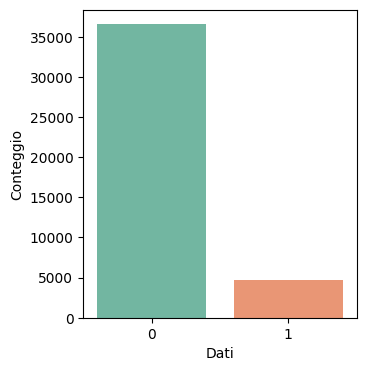

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.xlabel('Dati')
plt.ylabel('Conteggio')
sns.countplot(x = 'y', data = df, palette='Set2')

Possiamo notare come il dataset risulti sbilanciato sull'outcome, di conseguenza comprendiamo che successivamente dovremo sfruttare l'**undersampling** per migliorare le prestazioni negli algoritmi di machine learning.

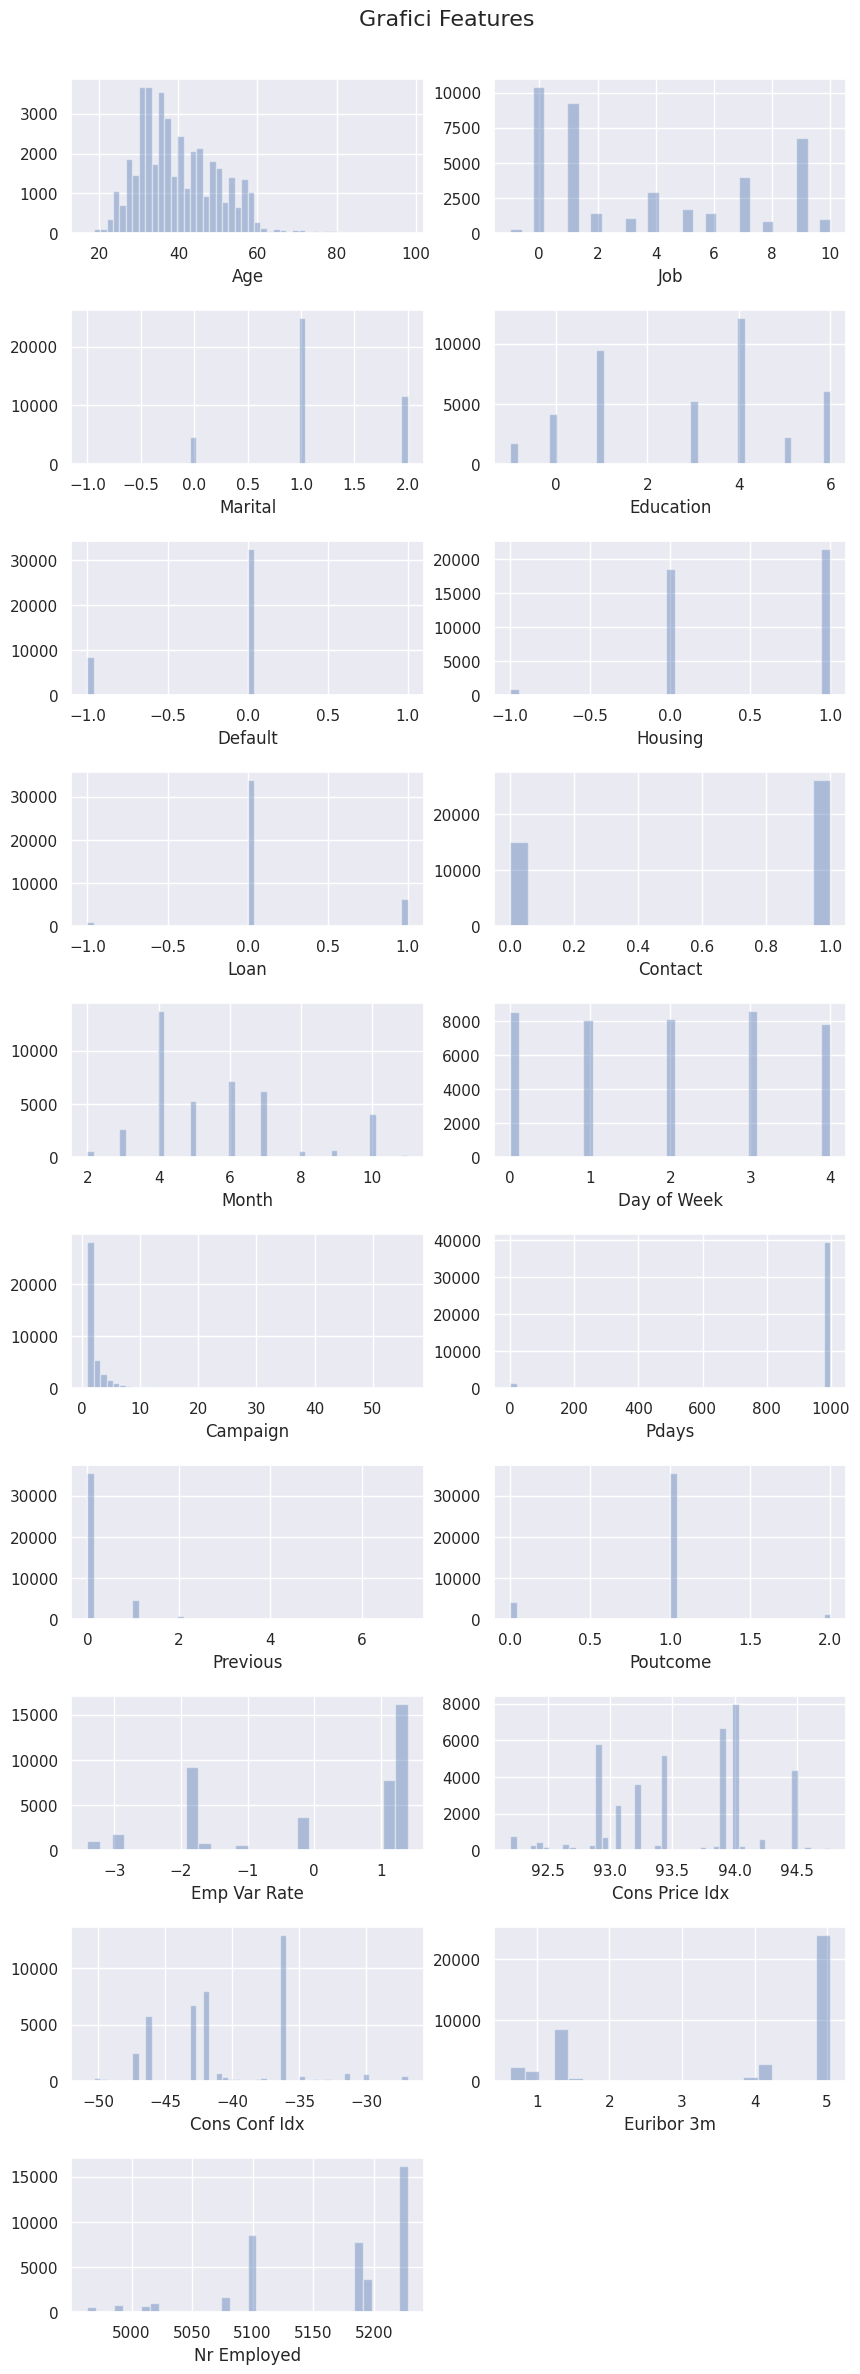

In [ ]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 35))

sns.set(color_codes=True)
plt.suptitle('Grafici Features', fontsize=16, y=0.90)
plt.subplot(12, 2, 1)
sns.distplot(df.age, kde=False)
plt.xlabel('Age')

plt.subplot(12, 2, 2)
sns.distplot(df.job, kde=False)
plt.xlabel('Job')

plt.subplot(12, 2, 3)
sns.distplot(df.marital, kde=False)
plt.xlabel('Marital')

plt.subplot(12, 2, 4)
sns.distplot(df.education, kde=False)
plt.xlabel('Education')

plt.subplot(12, 2, 5)
sns.distplot(df.default, kde=False)
plt.xlabel('Default')

plt.subplot(12, 2, 6)
sns.distplot(df.housing, kde=False)
plt.xlabel('Housing')

plt.subplot(12, 2, 7)
sns.distplot(df.loan, kde=False)
plt.xlabel('Loan')

plt.subplot(12, 2, 8)
sns.distplot(df.contact, kde=False)
plt.xlabel('Contact')

plt.subplot(12, 2, 9)
sns.distplot(df.month, kde=False)
plt.xlabel('Month')

plt.subplot(12, 2, 10)
sns.distplot(df.day_of_week, kde=False)
plt.xlabel('Day of Week')

plt.subplot(12, 2, 11)
sns.distplot(df.campaign, kde=False)
plt.xlabel('Campaign')

plt.subplot(12, 2, 12)
sns.distplot(df.pdays, kde=False)
plt.xlabel('Pdays')

plt.subplot(12, 2, 13)
sns.distplot(df.previous, kde=False)
plt.xlabel('Previous')

plt.subplot(12, 2, 14)
sns.distplot(df.poutcome, kde=False)
plt.xlabel('Poutcome')

plt.subplot(12, 2, 15)
sns.distplot(df.emp_var_rate, kde=False)
plt.xlabel('Emp Var Rate')

plt.subplot(12, 2, 16)
sns.distplot(df.cons_price_idx, kde=False)
plt.xlabel('Cons Price Idx')

plt.subplot(12, 2, 17)
sns.distplot(df.cons_conf_idx, kde=False)
plt.xlabel('Cons Conf Idx')

plt.subplot(12, 2, 18)
sns.distplot(df.euribor3m, kde=False)
plt.xlabel('Euribor 3m')

plt.subplot(12, 2, 19)
sns.distplot(df['nr-employed'], kde=False)
plt.xlabel('Nr Employed')

plt.subplots_adjust(hspace=0.5)
plt.show()


**osservazioni dai grafici:**
>* Età: Il dataset mostra una distribuzione dell’età con un picco evidente tra i 30 e i 40 anni.
* Stato Civile: L’analisi dello stato civile rivela un predominio di individui sposati.
* Mese: Un’altra osservazione interessante riguarda il mese di aprile, che mostra un picco notevole.
* Pdays: Infine, la variabile ‘pdays’, che rappresenta il numero di giorni trascorsi dall’ultimo contatto, mostra un’elevata frequenza del valore “999”. Questo valore è comunemente usato per indicare che non c’è stato alcun contatto precedente. Quindi, la maggior parte delle telefonate nel dataset rappresenta il primo contatto con l’individuo e potrebbe sottolineare la difficoltà nell'avere una seconda telefonata col potenziale cliente.


# Apprendimento Supervisionato


Separazione del dataframe in variabili indipendenti (features), posizionate nella lista X, e della variabile dipendente (outcome), contenuta in Y.

In [ ]:
X = df.drop('y', axis=1) #df senza y
y = df['y'] #df con solo y

**Introduzione**

L'apprendimento supervisionato è uno degli obiettivi dell'apprendimento automatico, caratterizzato da un insieme di esempi ed un insieme di features suddivese in features di input e features target.

Come si è notato nella fase di preparazione del dataset, abbiamo una variabile y (outcome) molto sbilanciata in favore del valore "0" ovvero, "no". Questo vuol dire che la maggior parte delle persone telefonate, rifiuta l'apertura del deposito. Al fine di bilanciare questa situazione, si applicherà l'**undersampling**, ridimensionando i "no". Verrà verificata la differenza di risultati con e senza undersampling.
>Un'altra tecnica molto utilizzata sui dataset sbilanciati è l'**oversampling**, la quale però se abusata, porta a dataset lontani dalla realtà osservata. Nel caso di progetto, parliamo di un dataset di 40.000 esempi, con un esigua percentuale di esempi in cui y = 1. Di conseguenza si ritiene una distanza eccessiva da colmare attraverso la tecnica dell'oversampling.

Per ottimizzare i modelli di ML, bisogna ottimizzarne i parametri. Al fine di trovare la combinazione migliore dei sudetti, verrà applicato il **grid search**, un esplorazione sistematica di tutte le possibili configurazioni della griglia al fine di trovare quella che offra la miglior prestazione per il modello.

Al fine di ottenere una stima più precisa delle performance di un modello rispetto alla classica divisione in set di addestramento e test viene applicata la **k-fold cross-validation**. La k-fold divide il dataset in k folds (sottoinsiemi) di dimensioni simili, andando  a valutare il modello k volte. In ogni iterazione, dei k folds:
* k-1 formano il set di addestramento
* l'ultimo fold svolge il ruolo di set di test

Infine, si è riflettuto sulla possibilità di ottimizzare una metrica tra precision e recall. Trattando un caso di predizione dell'apertura di un deposito bancario a fronte di una telefonata di marketing, non sono stati ritenuti maggiormento costosi i falsi positivi rispetto i falsi negativi o viceversa, di conseguenza si è optato per un ottimizzazione della **F1-measure**.

I modelli utilizzati saranno Random Forest, K-nearest neighbors(knn) ed MLP.



In [ ]:
#DataFrame vuoto per le performance
df_performance = pd.DataFrame()

##KNN


In [ ]:
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 50, 65, 70, 90, 110, 200]
weights = ['uniform']

# Parameters to test with GridSearchCV
param_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights
}


% ---------------- KNN su dati di test ---------------- %

Parametri ottimali: {'n_neighbors': 200, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7303
           1       0.68      0.18      0.29       935

    accuracy                           0.90      8238
   macro avg       0.79      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238


% ---------------- KNN su dati di training ---------------- %

Parametri ottimali: {'n_neighbors': 200, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.70      0.18      0.29      3705

    accuracy                           0.90     32950
   macro avg       0.81      0.59      0.62     32950
weighted avg       0.88      0.90      0.87     32950



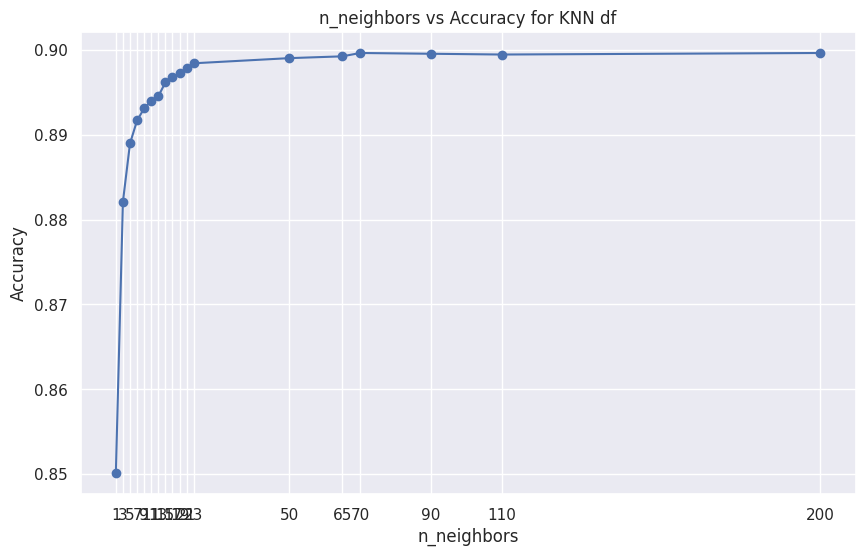

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Definizione di k
stratified_kfold = StratifiedKFold(n_splits=20)

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esegui la grid search con KNN sui dati di training
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Usa i migliori parametri trovati dalla GridSearch per addestrare il modello
best_params = grid_search.best_params_
model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
model.fit(X_train, y_train)

# Esegui la predizione sui dati di test
y_pred_test = model.predict(X_test)

# Stampare il classification report per i dati di test
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- KNN su dati di test ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_test)

# Esegui la predizione per la cross-validation sui dati di training
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=stratified_kfold)

# Stampa il classification report per la cross-validation sui dati di training
report_cv = classification_report(y_train, y_pred_cv)
print("\n% ---------------- KNN su dati di training ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, marker='o')
plt.title('n_neighbors vs Accuracy for KNN df')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()


###knn v2 undersampled



% ---------------- KNN on test data ---------------- %

Best parameters: {'n_neighbors': 200, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7303
           1       0.32      0.61      0.42       935

    accuracy                           0.81      8238
   macro avg       0.63      0.72      0.65      8238
weighted avg       0.87      0.81      0.83      8238


% ---------------- KNN on training data with cross-validation ---------------- %

Best parameters: {'n_neighbors': 200, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      3705
           1       0.79      0.63      0.70      3705

    accuracy                           0.73      7410
   macro avg       0.74      0.73      0.73      7410
weighted avg       0.74      0.73      0.73      7410



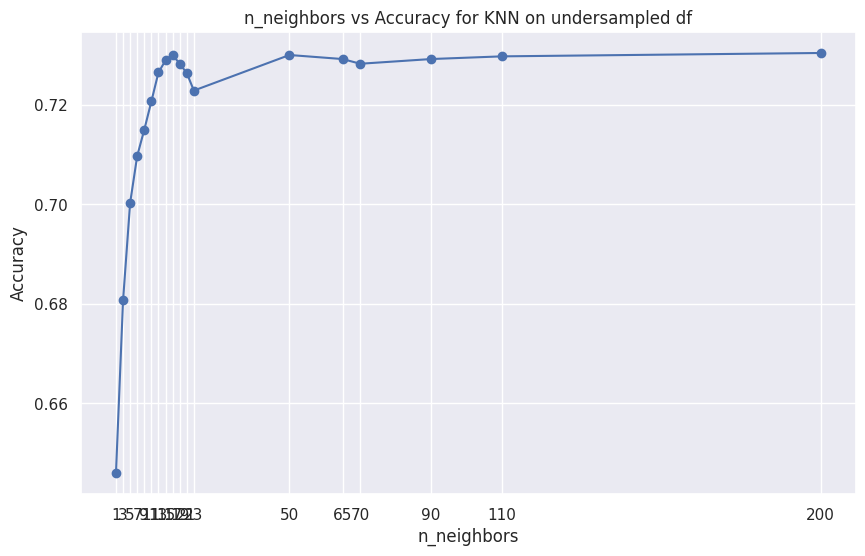

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=20)

# Perform grid search with KNN on the resampled training data
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train_resampled, y_train_resampled)

# Use the best parameters found by GridSearch to train the model
best_params = grid_search.best_params_
model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Print classification report for the test data
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- KNN on test data ---------------- %\n")
print("Best parameters:", best_params)
print(report_test)

# Make predictions for cross-validation on the training data
y_pred_cv = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=stratified_kfold)

# Print classification report for cross-validation on the training data
report_cv = classification_report(y_train_resampled, y_pred_cv)
print("\n% ---------------- KNN on training data with cross-validation ---------------- %\n")
print("Best parameters:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, marker='o')
plt.title('n_neighbors vs Accuracy for KNN on undersampled df')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()


##Random Forest


Parametri per la grid search

In [ ]:
# Parametri da testare con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    #massima profondità albero
    'max_depth': [6, 10, 20, 30, 40, 50, 75, 100, 150, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


###Random Forest sul dataframe originale

In [ ]:
#random forest su df originale

# Definizione il numero di fold per la cross-validation
k_folds = 20

# Inizializzare una lista per salvare tutti i report
all_reports_test = []
all_reports_train = []

# StratifiedKFold per la k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Creare il classificatore Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='f1_macro', refit=True, cv=stratified_kfold)

# Effettuare la ricerca dei parametri ottimali utilizzando GridSearchCV
grid_search.fit(X, y)

# Creare il classificatore Random Forest con i parametri ottimali
rf_classifier = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                        max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                        random_state=42)

# Visualizzare i parametri ottimali
print("Parametri ottimali:", grid_search.best_params_)

print ("\n% -------------------- Random Forest test -------------------- %\n")

# Effettuare la k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Addestrare il modello Random Forest sui dati di train
    rf_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di test
    y_pred = rf_classifier.predict(X_test)

    # Calcola il report di classificazione per il set di test
    report_test = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_test.append(report_test)

# Calcola la media dei report per il set di test
average_report_test = {}
for class_label in all_reports_test[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_test[class_label] = {}
        for metric in all_reports_test[0][class_label].keys():
            for report in all_reports_test:
                metric_values = report[class_label][metric]
                average_report_test[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di test
average_report_str_test = ""
for class_label, metrics in average_report_test.items():
    average_report_str_test += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_test += f"\t{metric}: {value:.2f}\n"

print("Average Report Test:")
print(average_report_str_test)

print ("\n% -------------------- Random Forest train -------------------- %\n")

# Effettuare la k-fold cross-validation per il set di train
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Addestrare il modello Random Forest sui dati di train
    rf_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di train
    y_pred_train = rf_classifier.predict(X_train)

    # Calcola il report di classificazione per il set di train
    report_train = classification_report(y_train, y_pred_train, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_train.append(report_train)

# Calcola la media dei report per il set di train
average_report_train = {}
for class_label in all_reports_train[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_train[class_label] = {}
        for metric in all_reports_train[0][class_label].keys():
            for report in all_reports_train:
                metric_values = report[class_label][metric]
                average_report_train[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di train
average_report_str_train = ""
for class_label, metrics in average_report_train.items():
    average_report_str_train += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_train += f"\t{metric}: {value:.2f}\n"

print("Average Report Train:")
print(average_report_str_train)


Parametri ottimali: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

% -------------------- Random Forest test -------------------- %

Average Report Test:
Class 0:
	precision: 0.92
	recall: 0.98
	f1-score: 0.95
	support: 1827.00
Class 1:
	precision: 0.61
	recall: 0.30
	f1-score: 0.40
	support: 232.00


% -------------------- Random Forest train -------------------- %

Average Report Train:
Class 0:
	precision: 0.94
	recall: 1.00
	f1-score: 0.97
	support: 34721.00
Class 1:
	precision: 0.95
	recall: 0.52
	f1-score: 0.67
	support: 4408.00



*osservazioni su random forest sul df originale*


>* Overfitting: il modello sembra soffrire di overfitting. Questo è evidente dal fatto che le metriche di precisione, recall e f1-score sono significativamente più alte sul set di addestramento rispetto al set di test. Ad esempio, la precisione per la classe 1 è del 95% sul set di addestramento, ma scende al 61% sul set di test.
* Bilanciamento delle classi: come visto anche in precedenza abbiamo uno squilibrio tra le classi che verrà affrontato successivamente con l'undersampling.
* Parametri del modello: la grid search ha scelto una profondità massima di 30 per l'albero, ciò potrebbe star contribuendo all'overfitting.
* Metriche di valutazione: la precisione per la classe 1 è relativamente bassa, il che indica che il modello ha un numero relativamente alto di falsi positivi per questa classe. Inoltre, il recall per la classe 1 è solo del 30%, il che indica che il modello non è in grado di identificare una grande percentuale dei veri positivi per questa classe.

Concludendo, ciò che possiamo evincere è che il random forest sul dataset originale non ha prodotto risultati accettabili.




###Random Forest con undersampling

In [ ]:
#random forest su df con undersampling

# Definizione il numero di fold per la cross-validation
k_folds = 10

# Inizializzare una lista per salvare tutti i report
all_reports_test = []
all_reports_train = []

# StratifiedKFold per la k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Creare il classificatore Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='f1_macro', refit=True, cv=stratified_kfold)

# Applica l'undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


# Effettuare la ricerca dei parametri ottimali utilizzando GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Creare il classificatore Random Forest con i parametri ottimali
rf_classifier = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                        max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                        random_state=42)

# Visualizzare i parametri ottimali
print("Parametri ottimali:", grid_search.best_params_)

print ("\n% -------------------- Random Forest test -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Addestrare il modello Random Forest sui dati di train
    rf_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di test
    y_pred = rf_classifier.predict(X_test)

    # Calcola il report di classificazione per il set di test
    report_test = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_test.append(report_test)

# Calcola la media dei report per il set di test
average_report_test = {}
for class_label in all_reports_test[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_test[class_label] = {}
        for metric in all_reports_test[0][class_label].keys():
            for report in all_reports_test:
                metric_values = report[class_label][metric]
                average_report_test[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di test
average_report_str_test = ""
for class_label, metrics in average_report_test.items():
    average_report_str_test += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_test += f"\t{metric}: {value:.2f}\n"

print("Average Report Test:")
print(average_report_str_test)

print ("\n% -------------------- Random Forest train -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]


    # Addestrare il modello Random Forest sui dati di train
    rf_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di train
    y_pred_train = rf_classifier.predict(X_train)

    # Calcola il report di classificazione per il set di train
    report_train = classification_report(y_train, y_pred_train, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_train.append(report_train)

# Calcola la media dei report per il set di train
average_report_train = {}
for class_label in all_reports_train[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_train[class_label] = {}
        for metric in all_reports_train[0][class_label].keys():
            for report in all_reports_train:
                metric_values = report[class_label][metric]
                average_report_train[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di train
average_report_str_train = ""
for class_label, metrics in average_report_train.items():
    average_report_str_train += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_train += f"\t{metric}: {value:.2f}\n"

print("Average Report Train:")
print(average_report_str_train)


Parametri ottimali: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

% -------------------- Random Forest test -------------------- %

Average Report Test:
Class 0:
	precision: 0.71
	recall: 0.86
	f1-score: 0.78
	support: 464.00
Class 1:
	precision: 0.82
	recall: 0.64
	f1-score: 0.72
	support: 464.00


% -------------------- Random Forest train -------------------- %

Average Report Train:
Class 0:
	precision: 0.72
	recall: 0.89
	f1-score: 0.79
	support: 4176.00
Class 1:
	precision: 0.85
	recall: 0.65
	f1-score: 0.74
	support: 4176.00



*osservazione sul random forest dopo l'applicazione del undersampling*

> * Bilanciamento delle classi: L’undersampling sembra aver aiutato a bilanciare le classi nel set di dati.
* Miglioramento delle prestazioni: Le metriche di precisione, recall e f1-score per la classe 1 sono migliorate nel set di test rispetto ai risultati precedenti. Questo indica che il modello è ora in grado di gestire meglio la classe 1 (classe minoritaria).
* Riduzione dell’overfitting: Le metriche di precisione, recall e f1-score sono ora più simili tra il set di addestramento e il set di test, il che suggerisce che l’overfitting potrebbe essere stato ridotto.
* Parametri del modello: I parametri ottimali trovati indicano che il modello Random Forest è meno complesso rispetto al modello precedente, con una profondità massima di 10. Questo potrebbe aver contribuito a ridurre l’overfitting.



Grafico F1 vs max depth per il random forest

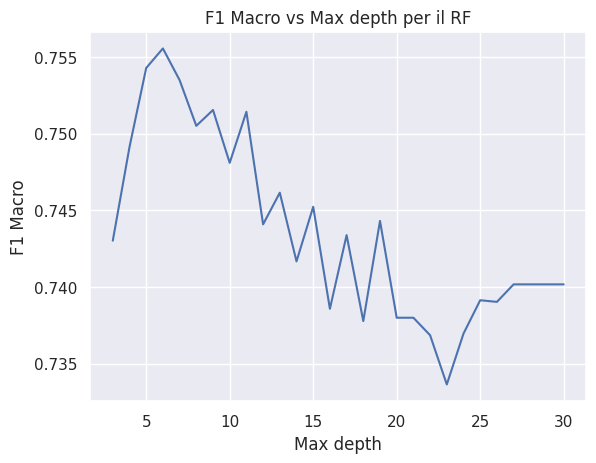

In [ ]:
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    #massima profondità albero
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
max_depths = np.arange(3, 31)
f1_scores = []

# Ottenere i migliori parametri dalla grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']


# Crea il classificatore RF con i parametri variabili
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    f1_macro_clf = f1_score(y_test, y_pred_clf, average='macro')
    f1_scores.append(f1_macro_clf)

plt.plot(max_depths, f1_scores)
plt.xlabel("Max depth")
plt.ylabel("F1 Macro")
plt.title("F1 Macro vs Max depth per il RF")
plt.show()


E' possibile notare dal grafico, osservando unicamente la max depth,che il picco della f1_macro, parametro che vogliamo massimizzare sia intorno ad un valore di 6. La grid search invece ha scelto una max depth di 10, per mediare con gli altri parametri e ottenere le prestazioni migliori. Dopo il picco, inoltre, il grafico mostra fluttuazioni significative, ciò denota che se aumentassimo la max depth, guadagneremmo instabilità e probabilmente attaccandosi troppo ai dati di train, overfitting.

*grafico accuracy*

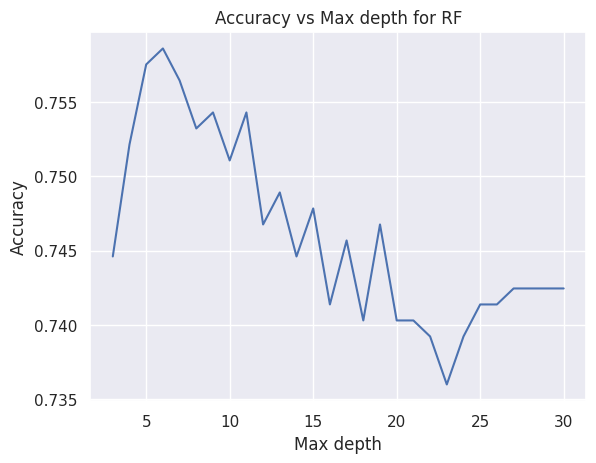

In [ ]:
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    #massima profondità albero
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
max_depths = np.arange(3, 31)
accuracy_scores = []

# Ottenere i migliori parametri dalla grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Crea il classificatore RF con i parametri variabili
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    accuracy_clf = accuracy_score(y_test, y_pred_clf)
    accuracy_scores.append(accuracy_clf)

plt.plot(max_depths, accuracy_scores)
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max depth for RF")
plt.show()


*grafico roc*

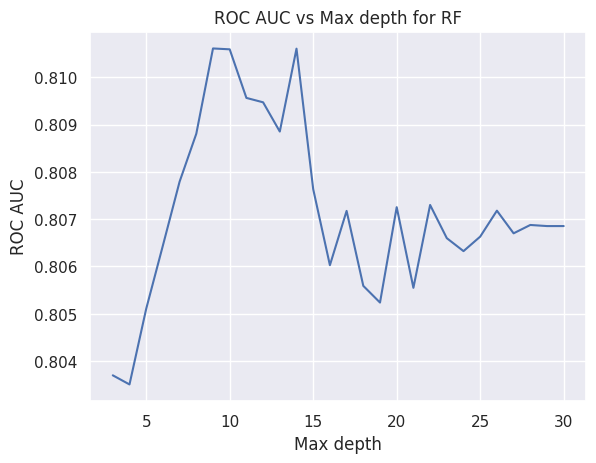

In [ ]:
from sklearn.metrics import roc_curve, auc

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    #massima profondità albero
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
max_depths = np.arange(3, 31)
roc_auc_scores = []

# Ottenere i migliori parametri dalla grid search
best_params = grid_search.best_params_
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

# Crea il classificatore RF con i parametri variabili
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict_proba(X_test)[:, 1]  # Probabilità di appartenere alla classe positiva
    fpr, tpr, _ = roc_curve(y_test, y_pred_clf)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

plt.plot(max_depths, roc_auc_scores)
plt.xlabel("Max depth")
plt.ylabel("ROC AUC")
plt.title("ROC AUC vs Max depth for RF")
plt.show()


##AdaBoost


In [ ]:
n_estimators = [10, 50, 100, 200, 250, 300]
# Parametri da testare con GridSearchCV per AdaBoost
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': [0.01, 0.1, 1.0],
}

###adaBoost v2 df originale

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import matplotlib.pyplot as plt

# Definizione del KFold stratificato
stratified_kfold = StratifiedKFold(n_splits=20)

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esegui la grid search con AdaBoost sui dati di training
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Usa i migliori parametri trovati dalla GridSearch per addestrare il modello
best_params = grid_search.best_params_
model = AdaBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
model.fit(X_train, y_train)

# Esegui la predizione sui dati di test
y_pred_test = model.predict(X_test)

# Stampare il classification report per i dati di test
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- AdaBoost su dati di test ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_test)

# Esegui la predizione per la cross-validation sui dati di training
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=stratified_kfold)

# Stampa il classification report per la cross-validation sui dati di training
report_cv = classification_report(y_train, y_pred_cv)
print("\n% ---------------- AdaBoost su dati di training ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['max_depth']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores_filtered, marker='o')
plt.title('max_depth vs Accuracy for XGBoost on undersampled df')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(param_grid['max_depth'])
plt.grid(True)
plt.show()



% ---------------- AdaBoost su dati di test ---------------- %

Parametri ottimali: {'learning_rate': 1.0, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.23      0.33       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238


% ---------------- AdaBoost su dati di training ---------------- %

Parametri ottimali: {'learning_rate': 1.0, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     29245
           1       0.67      0.24      0.35      3705

    accuracy                           0.90     32950
   macro avg       0.79      0.61      0.65     32950
weighted avg       0.88      0.90      0.88     32950



KeyError: 'max_depth'

### grafico adaboost df originale


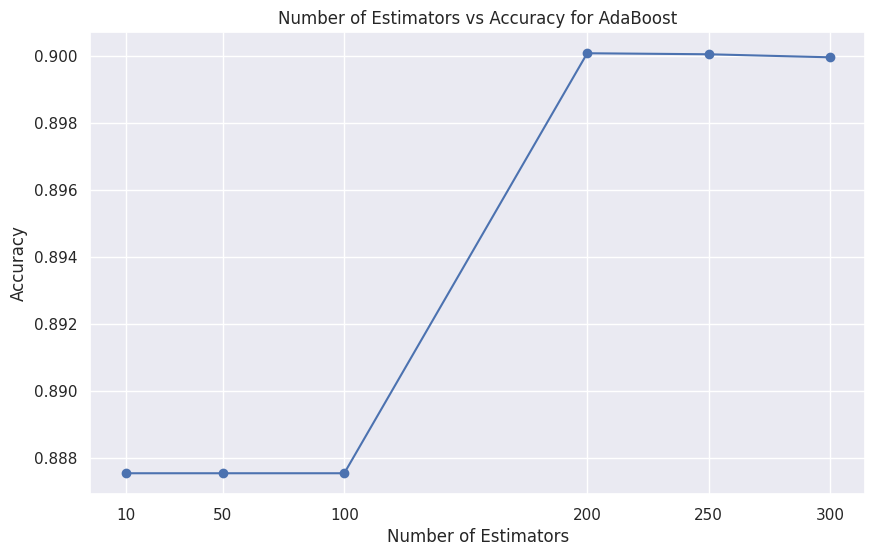

In [ ]:
# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['n_estimators']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_test_scores_filtered, marker='o')
plt.title('Number of Estimators vs Accuracy for AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(param_grid['n_estimators'])
plt.grid(True)
plt.show()


###adaboostv2 undersampled



% ---------------- AdaBoost on test data ---------------- %

Best parameters: {'learning_rate': 1.0, 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7303
           1       0.34      0.64      0.45       935

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238


% ---------------- AdaBoost on training data with cross-validation ---------------- %

Best parameters: {'learning_rate': 1.0, 'n_estimators': 250}
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3705
           1       0.80      0.66      0.72      3705

    accuracy                           0.75      7410
   macro avg       0.76      0.75      0.75      7410
weighted avg       0.76      0.75      0.75      7410



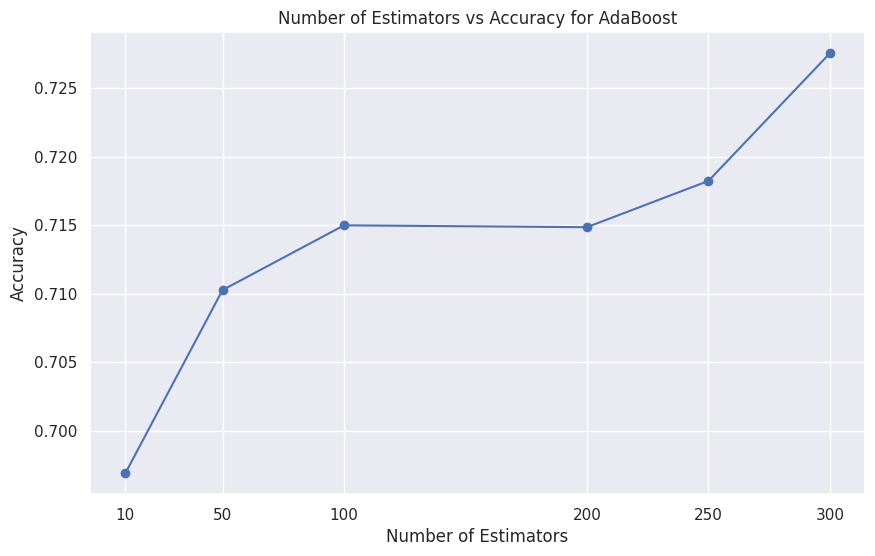

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=20)

# Perform grid search with AdaBoost on the resampled training data
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train_resampled, y_train_resampled)

# Use the best parameters found by GridSearch to train the model
best_params = grid_search.best_params_
model = AdaBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Print classification report for the test data
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- AdaBoost on test data ---------------- %\n")
print("Best parameters:", best_params)
print(report_test)

# Make predictions for cross-validation on the training data
y_pred_cv = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=stratified_kfold)

# Print classification report for cross-validation on the training data
report_cv = classification_report(y_train_resampled, y_pred_cv)
print("\n% ---------------- AdaBoost on training data with cross-validation ---------------- %\n")
print("Best parameters:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['n_estimators']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], mean_test_scores_filtered, marker='o')
plt.title('Number of Estimators vs Accuracy for AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(param_grid['n_estimators'])
plt.grid(True)
plt.show()



##xgBoost

###xgBoost su df originale


Osservando il grafico ottenuto si è provato ad aumentare la max depth, ma si è ottenuto un tempo di molto elevato da parte della piattaforma colab per l'esecuzione. Si è ritenuto che per sviluppi futuri potrebbe essere interessante portare avanti queste esecuzioni, ma ad oggi per poter portare avanti la documentazione ed il progetto rispettando le scadenza, si è ritenuto che le risorse nel rapporto hardware/tempo non siano sufficienti.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, StratifiedKFold


n_estimators = [10, 50, 100, 200, 250, 300]
learning_rates = [0.01, 0.1, 1.0]
max_depth = [6, 10, 20, 30, 40, 50, 75 , 100]

# Parametri da testare con GridSearchCV per XGBoost
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rates,
    'max_depth': max_depth
}



% ---------------- XGBoost su dati di test ---------------- %

Parametri ottimali: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.63      0.25      0.36       935

    accuracy                           0.90      8238
   macro avg       0.77      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238


% ---------------- XGBoost su dati di training ---------------- %

Parametri ottimali: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     29245
           1       0.67      0.27      0.38      3705

    accuracy                           0.90     32950
   macro avg       0.79      0.62      0.66     32950
weighted avg       0.89      0.90      0.88     32950



ValueError: x and y must have same first dimension, but have shapes (8,) and (144,)

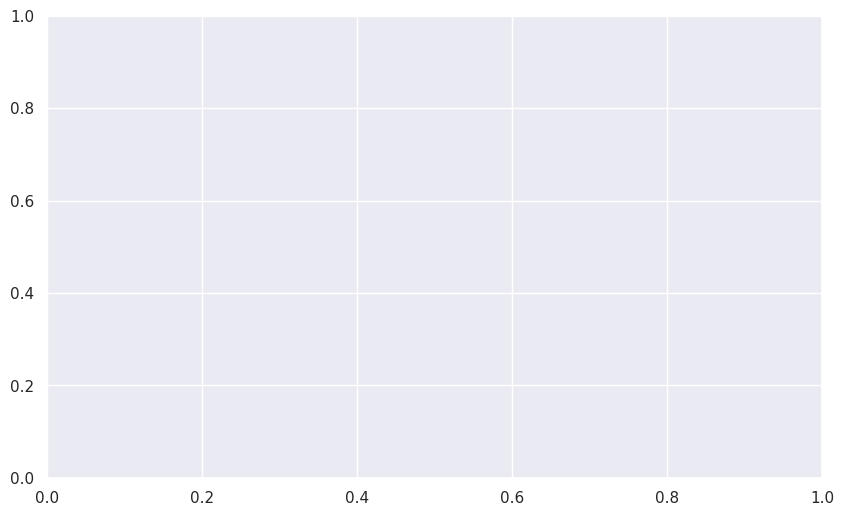

In [ ]:
#xgBoost su df originale
from sklearn.metrics import classification_report, accuracy_score

#definizione di k
stratified_kfold = StratifiedKFold(n_splits=20)

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esegui la grid search con XGBoost sui dati di training
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Usa i migliori parametri trovati dalla GridSearch per addestrare il modello
best_params = grid_search.best_params_
model = xgb.XGBClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
model.fit(X_train, y_train)

# Esegui la predizione sui dati di test
y_pred_test = model.predict(X_test)

# Stampare il classification report per i dati di test
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- XGBoost su dati di test ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_test)

# Esegui la predizione per la cross-validation sui dati di training
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=stratified_kfold)

# Stampa il classification report per la cross-validation sui dati di training
report_cv = classification_report(y_train, y_pred_cv)
print("\n% ---------------- XGBoost su dati di training ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['max_depth']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores_filtered, marker='o')
plt.title('max_depth vs Accuracy for XGBoost df')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(param_grid['max_depth'])
plt.grid(True)
plt.show()


Grafico corretto

In [ ]:

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['max_depth']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores_filtered, marker='o')
plt.title('max_depth vs Accuracy for XGBoost df')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(param_grid['max_depth'])
plt.grid(True)
plt.show()

KeyError: 'max_depth'

La Grid Search non mira direttamente a massimizzare la relazione tra una singola variabile (come max_depth) e l'accuratezza, ma piuttosto cerca di trovare la combinazione ottimale di iperparametri che massimizzi la metrica di valutazione specificata (nel caso in oggetto, l'accuratezza). Segue che non ci si stupisce che la grid search non abbia scelto direttamente la profonditàa a 50. Il calo di accuracy al crescere della max depth, si suppone sia dovuto ad overfitting e/o rumore presente all'interno dei dati.

###xgBoost con undersampling



% ---------------- XGBoost on test data ---------------- %

Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7303
           1       0.36      0.64      0.46       935

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238


% ---------------- XGBoost on training data with cross-validation ---------------- %

Best parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      3705
           1       0.81      0.65      0.72      3705

    accuracy                           0.75      7410
   macro avg       0.76      0.75      0.75      7410
weighted avg       0.76      0.75      0.75      7410



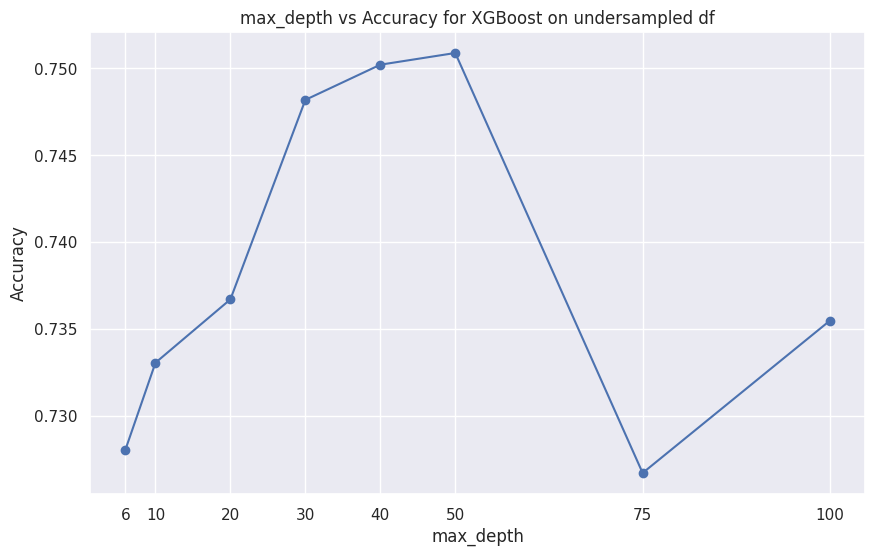

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Assuming you have defined X, y, and param_grid

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=20)

# Perform grid search with XGBoost on the resampled training data
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train_resampled, y_train_resampled)

# Use the best parameters found by GridSearch to train the model
best_params = grid_search.best_params_
model = xgb.XGBClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Print classification report for the test data
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- XGBoost on test data ---------------- %\n")
print("Best parameters:", best_params)
print(report_test)

# Make predictions for cross-validation on the training data
y_pred_cv = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=stratified_kfold)

# Print classification report for cross-validation on the training data
report_cv = classification_report(y_train_resampled, y_pred_cv)
print("\n% ---------------- XGBoost on training data with cross-validation ---------------- %\n")
print("Best parameters:", best_params)
print(report_cv)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['max_depth']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores_filtered, marker='o')
plt.title('max_depth vs Accuracy for XGBoost on undersampled df')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(param_grid['max_depth'])
plt.grid(True)
plt.show()

### xgBoost con scale

In [ ]:
n_estimators = [10, 50, 100, 200, 250, 300]
learning_rates = [0.01, 0.1, 1.0]
max_depth = [6, 10, 20, 30, 40, 50, 100]

# Parametri da testare con GridSearchCV per XGBoost
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rates,
    'max_depth': max_depth
}


% ---------------- XGBoost su dati di addestramento ---------------- %

Parametri ottimali: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     29245
           1       0.41      0.66      0.50      3705

    accuracy                           0.85     32950
   macro avg       0.68      0.77      0.71     32950
weighted avg       0.89      0.85      0.87     32950


% ---------------- XGBoost su dati di test ---------------- %

Parametri ottimali: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7303
           1       0.38      0.60      0.47       935

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.88      0.84      0.86      8238



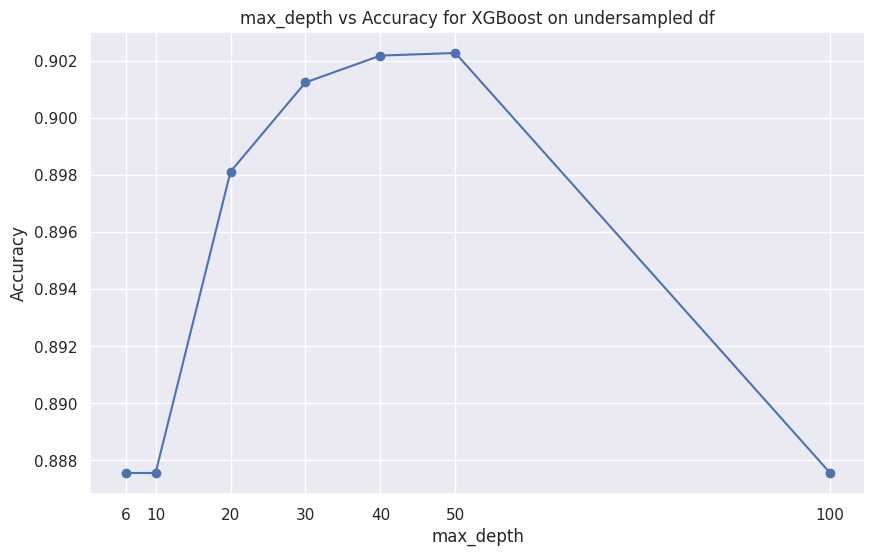

In [ ]:
#xgB con scale_pos_weight
#Impostare il parametro scale_pos_weight: In XGBoost, puoi impostare il parametro scale_pos_weight per penalizzare erroneamente la classificazione della classe maggioritaria (0) rispetto alla classe minoritaria (1). Questo parametro può essere impostato uguale al rapporto tra il numero di esempi della classe 0 e il numero di esempi della classe 1.

import xgboost as xgb
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


# Calcola il rapporto tra il numero di esempi della classe 0 e il numero di esempi della classe 1
class_ratio = len(y[y == 0]) / len(y[y == 1])

# Definisci il tuo KFold
stratified_kfold = StratifiedKFold(n_splits=20)

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esegui la grid search con XGBoost
grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring='accuracy', cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Usa i migliori parametri trovati dalla GridSearch
best_params = grid_search.best_params_

# Imposta il parametro scale_pos_weight nel rapporto tra le classi
xgb_params = {
    'n_estimators': best_params['n_estimators'],
    'learning_rate': best_params['learning_rate'],
    'scale_pos_weight': class_ratio
}

# Addestra il modello XGBoost con i migliori parametri e il parametro scale_pos_weight
model = xgb.XGBClassifier(n_estimators=best_params['n_estimators'],
                          learning_rate=best_params['learning_rate'],
                          scale_pos_weight=class_ratio)  # Qui si passa scale_pos_weight
model.fit(X_train, y_train)


# Esegui la predizione per la cross-validation sui dati di training
y_pred_cv = cross_val_predict(model, X_train, y_train, cv=stratified_kfold)


# Stampa il classification report per i dati di addestramento
y_pred_train = model.predict(X_train)
report_train = classification_report(y_train, y_pred_train)
print("\n% ---------------- XGBoost su dati di addestramento ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_train)

# Esegui la predizione sui dati di test
y_pred_test = model.predict(X_test)

# Stampa il classification report per i dati di test
report_test = classification_report(y_test, y_pred_test)
print("\n% ---------------- XGBoost su dati di test ---------------- %\n")
print("Parametri ottimali:", best_params)
print(report_test)


# Ottieni solo i risultati corrispondenti ai parametri utilizzati
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_test_scores_filtered = [mean_test_scores[i] for i in range(len(param_grid['max_depth']))]

# Stampa il grafico
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores_filtered, marker='o')
plt.title('max_depth vs Accuracy for XGBoost on undersampled df')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(param_grid['max_depth'])
plt.grid(True)
plt.show()

##MLP


###MLP su df originale

In [ ]:
# Definizione il numero di fold per la cross-validation
k_folds = 20

# Inizializzare una lista per salvare tutti i report
all_reports_test = []
all_reports_train = []

# StratifiedKFold per la k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Parametri da testare con GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.05],
}

# Creare il classificatore MLP
mlp_classifier = MLPClassifier(random_state=42)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='accuracy', refit=True, cv=stratified_kfold)

# Effettuare la ricerca dei parametri ottimali utilizzando GridSearchCV
grid_search.fit(X, y)

# Creare il classificatore MLP con i parametri ottimali
mlp_classifier = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                               activation=grid_search.best_params_['activation'],
                               alpha=grid_search.best_params_['alpha'],
                               random_state=42)

# Visualizzare i parametri ottimali
print("Parametri ottimali:", grid_search.best_params_)

print ("\n% -------------------- MLP test -------------------- %\n")

# Effettuare la k-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di test
    y_pred = mlp_classifier.predict(X_test)

    # Calcola il report di classificazione per il set di test
    report_test = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_test.append(report_test)

# Calcola la media dei report per il set di test
average_report_test = {}
for class_label in all_reports_test[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_test[class_label] = {}
        for metric in all_reports_test[0][class_label].keys():
            for report in all_reports_test:
                metric_values = report[class_label][metric]
                average_report_test[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di test
average_report_str_test = ""
for class_label, metrics in average_report_test.items():
    average_report_str_test += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_test += f"\t{metric}: {value:.2f}\n"

print("Average Report Test:")
print(average_report_str_test)

print ("\n% -------------------- MLP train -------------------- %\n")

# Effettuare la k-fold cross-validation per il set di train
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di train
    y_pred_train = mlp_classifier.predict(X_train)

    # Calcola il report di classificazione per il set di train
    report_train = classification_report(y_train, y_pred_train, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_train.append(report_train)

# Calcola la media dei report per il set di train
average_report_train = {}
for class_label in all_reports_train[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_train[class_label] = {}
        for metric in all_reports_train[0][class_label].keys():
            for report in all_reports_train:
                metric_values = report[class_label][metric]
                average_report_train[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di train
average_report_str_train = ""
for class_label, metrics in average_report_train.items():
    average_report_str_train += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_train += f"\t{metric}: {value:.2f}\n"

print("Average Report Train:")
print(average_report_str_train)


Parametri ottimali: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}

% -------------------- MLP test -------------------- %

Average Report Test:
Class 0:
	precision: 0.91
	recall: 0.98
	f1-score: 0.94
	support: 1827.00
Class 1:
	precision: 0.61
	recall: 0.22
	f1-score: 0.33
	support: 232.00


% -------------------- MLP train -------------------- %

Average Report Train:
Class 0:
	precision: 0.91
	recall: 0.99
	f1-score: 0.94
	support: 34721.00
Class 1:
	precision: 0.64
	recall: 0.21
	f1-score: 0.31
	support: 4408.00



*osservazioni sul MLP con df originale*


> * overfitting: il modello non presenta trade off tra valori delle metriche nel train e nel test, di conseguenza non possiamo notare overfitting da questi risultati.
* performance: come visto fin'ora, vi è differenza di performance tra la classe maggioritaria e minoritaria, nella classe 0 otteniamo ottimi risultati, mentre nella classe 1 i risultati non sono buoni. Successivamente si proverà attraverso undersampling ad equlibrare per osservare come muteranno i risultati.






###MLP CON UNDERSAMLING

In [ ]:
#MLP CON UNDERSAMPLING

# Definizione il numero di fold per la cross-validation
k_folds = 10

# Inizializzare una lista per salvare tutti i report
all_reports_test = []
all_reports_train = []

# StratifiedKFold per la k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Parametri da testare con GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.05],
}

# Creare il classificatore MLP
mlp_classifier = MLPClassifier(random_state=42)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='accuracy', refit=True, cv=stratified_kfold)

# Applica l'undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

grid_search.fit(X_resampled, y_resampled)

# Creare il classificatore MLP con i parametri ottimali
mlp_classifier = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                               activation=grid_search.best_params_['activation'],
                               alpha=grid_search.best_params_['alpha'],
                               random_state=42)

# Visualizzare i parametri ottimali
print("Parametri ottimali:", grid_search.best_params_)

print ("\n% -------------------- MLP test -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di test
    y_pred = mlp_classifier.predict(X_test)

    # Calcola il report di classificazione per il set di test
    report_test = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_test.append(report_test)

# Calcola la media dei report per il set di test
average_report_test = {}
for class_label in all_reports_test[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_test[class_label] = {}
        for metric in all_reports_test[0][class_label].keys():
            for report in all_reports_test:
                metric_values = report[class_label][metric]
                average_report_test[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di test
average_report_str_test = ""
for class_label, metrics in average_report_test.items():
    average_report_str_test += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_test += f"\t{metric}: {value:.2f}\n"

print("Average Report Test:")
print(average_report_str_test)

print ("\n% -------------------- MLP train -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling per il set di train
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di train
    y_pred_train = mlp_classifier.predict(X_train)

    # Calcola il report di classificazione per il set di train
    report_train = classification_report(y_train, y_pred_train, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_train.append(report_train)

# Calcola la media dei report per il set di train
average_report_train = {}
for class_label in all_reports_train[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_train[class_label] = {}
        for metric in all_reports_train[0][class_label].keys():
            for report in all_reports_train:
                metric_values = report[class_label][metric]
                average_report_train[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di train
average_report_str_train = ""
for class_label, metrics in average_report_train.items():
    average_report_str_train += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_train += f"\t{metric}: {value:.2f}\n"

print("Average Report Train:")
print(average_report_str_train)


Parametri ottimali: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}

% -------------------- MLP test -------------------- %

Average Report Test:
Class 0:
	precision: 0.65
	recall: 0.92
	f1-score: 0.76
	support: 464.00
Class 1:
	precision: 0.86
	recall: 0.51
	f1-score: 0.64
	support: 464.00


% -------------------- MLP train -------------------- %

Average Report Train:
Class 0:
	precision: 0.64
	recall: 0.92
	f1-score: 0.76
	support: 4176.00
Class 1:
	precision: 0.86
	recall: 0.49
	f1-score: 0.63
	support: 4176.00



*osservazione su MLP con undersampling*
rispetto la versione su df originale:
> * per la classe 0(maggioritaria): possiamo notare un generale calo delle perfomance delle metriche, con un guadagno in termini di credibilità però dei dati ottenuti.
* per la classe 1 (minoritaria): possiamo notare un ottimo miglioramento delle perfomrance, con la classe minoritaria che ha beneficiata dal bilancimento delle due classi



*grafico f1 vs hidden_layer_sizes*

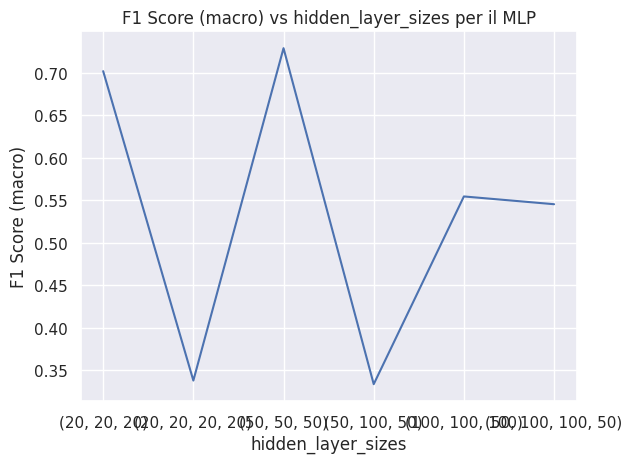

In [ ]:
from sklearn.metrics import f1_score

# Definire i parametri da testare con GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50), (50, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}

hidden_layer_sizes = [(20, 20, 20), (20, 20, 20, 20), (50, 50, 50), (50, 100, 50), (100, 100, 100), (50, 100, 100, 50)]
f1_scores = []

# Ottenere i migliori parametri dalla grid search
best_params = grid_search.best_params_
best_hidden_layer_sizes = best_params['hidden_layer_sizes']
best_activation = best_params['activation']
best_alpha = best_params['alpha']

# Crea il classificatore RF con i parametri variabili
for hidden_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_size, activation=best_activation, alpha=best_alpha, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_clf = clf.predict(X_test)
    f1_clf = f1_score(y_test, y_pred_clf, average='macro')
    f1_scores.append(f1_clf)

# Converti l'array in una lista di stringhe
hidden_layer_sizes_str = [str(item) for item in hidden_layer_sizes]

plt.plot(hidden_layer_sizes_str, f1_scores)
plt.xlabel("hidden_layer_sizes")
plt.ylabel("F1 Score (macro)")
plt.title("F1 Score (macro) vs hidden_layer_sizes per il MLP")
plt.show()


per provare ad evitare l'overfitting diminuiamo i layer

In [ ]:
hidden_layer_sizes = [(5, 5), (10, 10), (15, 15)],  # Ridotti i neuroni per layer

# Parametri da testare con GridSearchCV
param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.05],
}

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
import numpy as np

# Definizione del numero di fold per la cross-validation
k_folds = 10  # Ridotto a 5 per via delle dimensioni del dataset

# Inizializzazione delle liste per salvare tutti i report
all_reports_test = []
all_reports_train = []

# StratifiedKFold per la k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)


# Creare il classificatore MLP
mlp_classifier = MLPClassifier(random_state=42)

# Creare l'oggetto GridSearchCV
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='f1_macro', refit=True, cv=stratified_kfold)

# Applica l'undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

grid_search.fit(X_resampled, y_resampled)

# Creare il classificatore MLP con i parametri ottimali
mlp_classifier = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                               activation=grid_search.best_params_['activation'],
                               alpha=grid_search.best_params_['alpha'],
                               random_state=42)

# Visualizzare i parametri ottimali
print("Parametri ottimali:", grid_search.best_params_)

print ("\n% -------------------- MLP test -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di test
    y_pred = mlp_classifier.predict(X_test)

    # Calcola il report di classificazione per il set di test
    report_test = classification_report(y_test, y_pred, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_test.append(report_test)

# Calcola la media dei report per il set di test
average_report_test = {}
for class_label in all_reports_test[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_test[class_label] = {}
        for metric in all_reports_test[0][class_label].keys():
            for report in all_reports_test:
                metric_values = report[class_label][metric]
                average_report_test[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di test
average_report_str_test = ""
for class_label, metrics in average_report_test.items():
    average_report_str_test += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_test += f"\t{metric}: {value:.2f}\n"

print("Average Report Test:")
print(average_report_str_test)

print ("\n% -------------------- MLP train -------------------- %\n")

# Effettuare la k-fold cross-validation con sampling per il set di train
for train_index, test_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Addestrare il modello MLP sui dati di train
    mlp_classifier.fit(X_train, y_train)

    # Effettuare le previsioni sul set di train
    y_pred_train = mlp_classifier.predict(X_train)

    # Calcola il report di classificazione per il set di train
    report_train = classification_report(y_train, y_pred_train, digits=2, output_dict=True)

    # Aggiungi il report alla lista di tutti i report
    all_reports_train.append(report_train)

# Calcola la media dei report per il set di train
average_report_train = {}
for class_label in all_reports_train[0].keys():
    if class_label.isdigit():  # controlla se il label della classe è un numero
        average_report_train[class_label] = {}
        for metric in all_reports_train[0][class_label].keys():
            for report in all_reports_train:
                metric_values = report[class_label][metric]
                average_report_train[class_label][metric] = np.mean(metric_values)

# Converte il report medio in formato stringa per il set di train
average_report_str_train = ""
for class_label, metrics in average_report_train.items():
    average_report_str_train += f"Class {class_label}:\n"
    for metric, value in metrics.items():
        average_report_str_train += f"\t{metric}: {value:.2f}\n"

print("Average Report Train:")
print(average_report_str_train)


Parametri ottimali: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 10)}

% -------------------- MLP test -------------------- %

Average Report Test:
Class 0:
	precision: 0.66
	recall: 0.89
	f1-score: 0.76
	support: 464.00
Class 1:
	precision: 0.83
	recall: 0.53
	f1-score: 0.65
	support: 464.00


% -------------------- MLP train -------------------- %

Average Report Train:
Class 0:
	precision: 0.65
	recall: 0.89
	f1-score: 0.75
	support: 4176.00
Class 1:
	precision: 0.83
	recall: 0.53
	f1-score: 0.64
	support: 4176.00



In [ ]:
import sys

print("Versione di Python in uso:")
print(sys.version)


Versione di Python in uso:
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# Apprendimento probabilistico


##Naive bayes


% ---------------- Naive Bayes su dati di test ---------------- %

Parametri ottimali: {'var_smoothing': 0.001}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.52      0.26      0.35       935

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.64      8238
weighted avg       0.87      0.89      0.87      8238


% ---------------- Naive Bayes su dati di training ---------------- %

Parametri ottimali: {'var_smoothing': 0.001}
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     29245
           1       0.55      0.28      0.37      3705

    accuracy                           0.89     32950
   macro avg       0.73      0.62      0.66     32950
weighted avg       0.87      0.89      0.88     32950



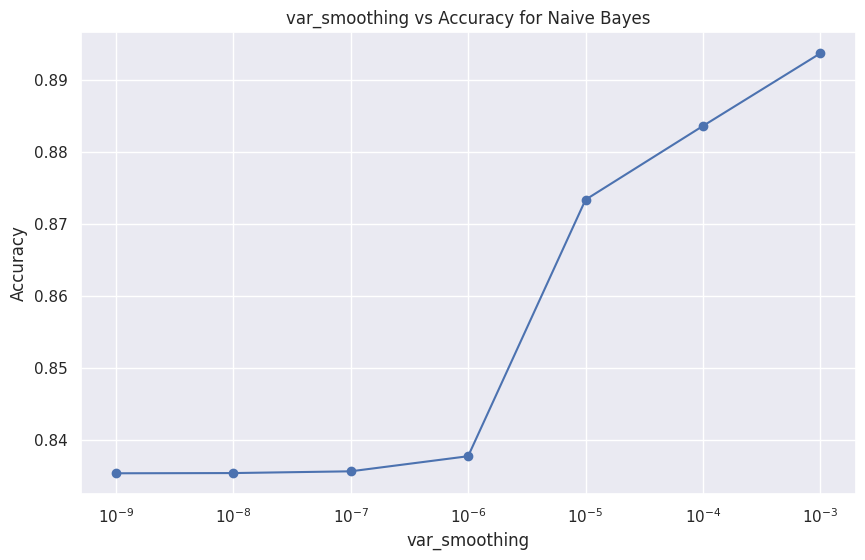

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Definizione dei parametri da testare con GridSearchCV per Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
}

# Split dei dati in training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Esegui la grid search con Naive Bayes sui dati di training
grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, scoring='accuracy', cv=stratified_kfold)
grid_search_nb.fit(X_train, y_train)

# Usa i migliori parametri trovati dalla GridSearch per addestrare il modello Naive Bayes
best_params_nb = grid_search_nb.best_params_
model_nb = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])
model_nb.fit(X_train, y_train)

# Esegui la predizione sui dati di test con Naive Bayes
y_pred_test_nb = model_nb.predict(X_test)

# Stampare il classification report per i dati di test con Naive Bayes
report_test_nb = classification_report(y_test, y_pred_test_nb)
print("\n% ---------------- Naive Bayes su dati di test ---------------- %\n")
print("Parametri ottimali:", best_params_nb)
print(report_test_nb)

# Esegui la predizione per la cross-validation sui dati di training con Naive Bayes
y_pred_cv_nb = cross_val_predict(model_nb, X_train, y_train, cv=stratified_kfold)

# Stampa il classification report per la cross-validation sui dati di training con Naive Bayes
report_cv_nb = classification_report(y_train, y_pred_cv_nb)
print("\n% ---------------- Naive Bayes su dati di training ---------------- %\n")
print("Parametri ottimali:", best_params_nb)
print(report_cv_nb)

# Ottieni solo i risultati corrispondenti ai parametri utilizzati per Naive Bayes
mean_test_scores_nb = grid_search_nb.cv_results_['mean_test_score']

# Stampa il grafico per Naive Bayes
plt.figure(figsize=(10, 6))
plt.plot(param_grid_nb['var_smoothing'], mean_test_scores_nb, marker='o')
plt.title('var_smoothing vs Accuracy for Naive Bayes')
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xscale('log')  # Poiché i valori di var_smoothing variano su una scala logaritmica
plt.show()
